# Decision Tree Classifier
### Aim:  To classify if a person is diabetic or not.
### Dataset: Diabetes
### Source: Kaggle


In [ ]:
#Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [ ]:
#Loading the data
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

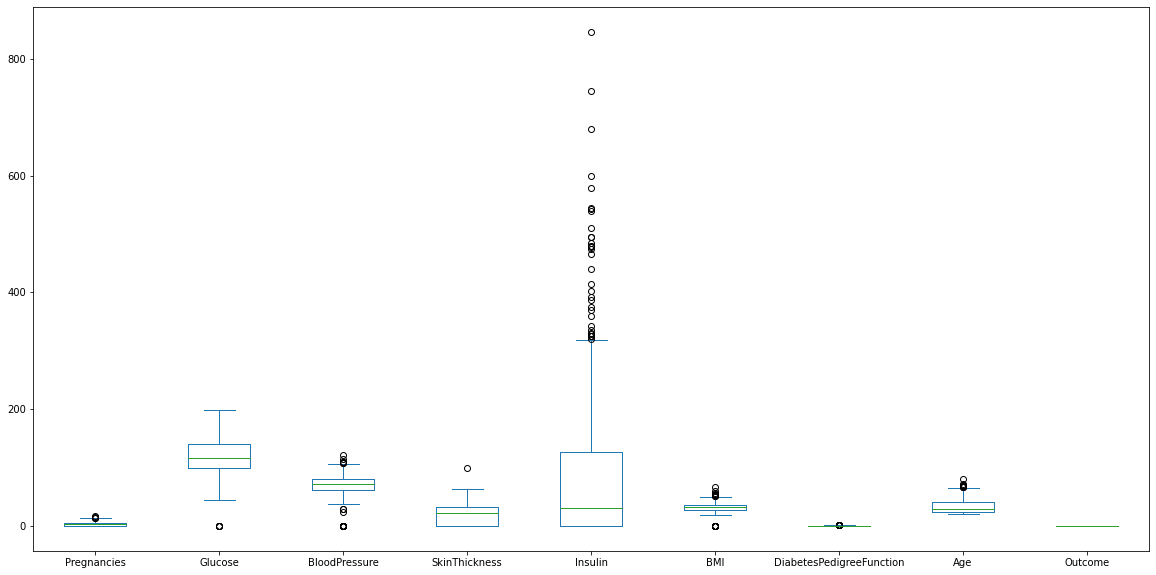

In [ ]:
data.plot(kind="box", figsize=(20,10))

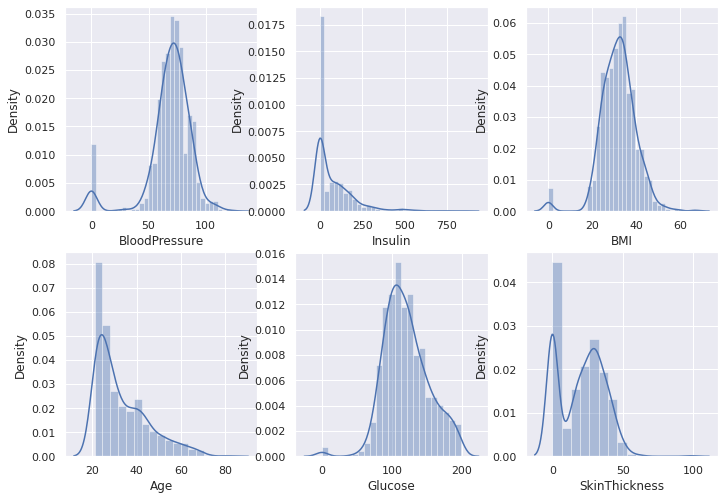

In [ ]:
# Distributions of the features containing outliers
from scipy.stats import skew
count=1
for i in data[["BloodPressure","Insulin","BMI","Age","Glucose","SkinThickness"]]:
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  plt.subplot(2,3,count)
  sns.distplot(data[i])
  count+=1


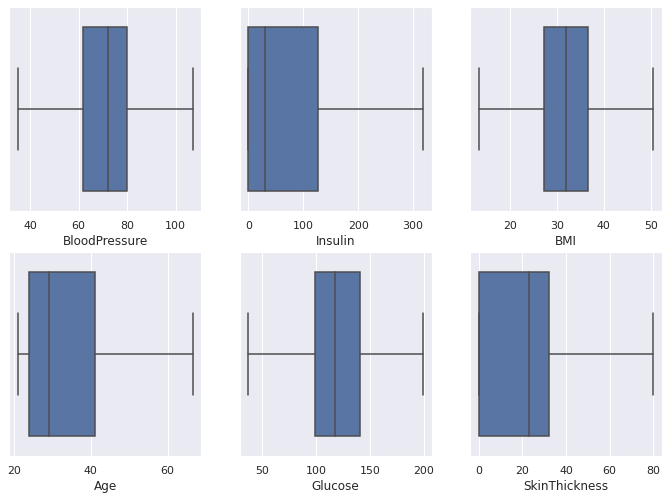

In [ ]:
# Capping the outliers using quartiles
def quartiles(data):
  q1=data.quantile(0.25)
  q3=data.quantile(0.75)
  IQR=q3-q1
  upper = q3 + 1.5*IQR
  lower = q1 - 1.5*IQR
  return upper,lower


df = data.copy()
def rem_outliers(i,upper,lower):
   df[i]=np.where(df[i]>upper,upper,
         np.where(df[i]<lower,lower,
        df[i]))


col = ["BloodPressure","Insulin","BMI","Age","Glucose","SkinThickness"]
for i in col:
  a,b = quartiles(data[i])
  rem_outliers(i,a,b)

# Boxplot after removing the outliers
count=1
for i in df[["BloodPressure","Insulin","BMI","Age","Glucose","SkinThickness"]]:
  #fig,ax = plt.subplots(figsize=(10,5))
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  plt.subplot(2,3,count)
  sns.boxplot(df[i])
  count+=1

* The dataset consists of 768 records and 9 columns. All the features are numerical. "Outcome" is the Dependent Variables consisting of classes 0 and 1. There are no missing values in the dataset and the features containing outliers have been removed.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [ ]:
x = data.iloc[:,:-1]
y = data["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.20)

In [ ]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_pred =classifier.predict(x_test)

In [ ]:
from sklearn import metrics,tree
Accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy", Accuracy)

Accuracy 0.7207792207792207


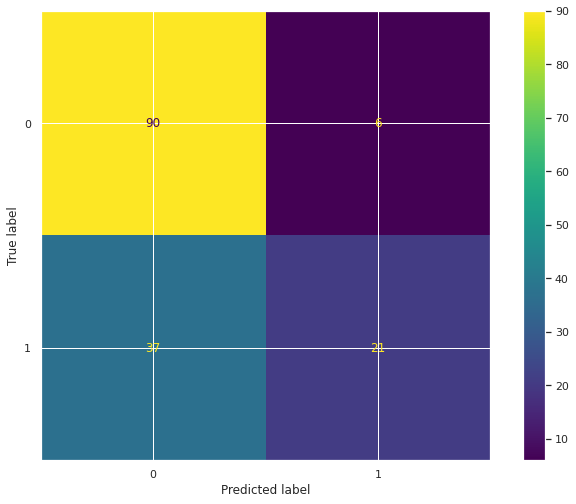

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test,y_test)

21 persons having  diabetes were correctly classified by the model as diabetic.
90 non diabetic patients were classified as non diabetic.
6 of the non diabtic patients were incorrectly classified as belonging to the positive class(diabetic class) by the model. 37 patients having diabetis were predicted has not having diabetis.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        96
           1       0.78      0.36      0.49        58

    accuracy                           0.72       154
   macro avg       0.74      0.65      0.65       154
weighted avg       0.73      0.72      0.69       154



Out of all non diabetic classes that have been predicted correctly by the model, 71% of  them were actually true.  Out of total positive classes of non diabetic,our model was able to predict all the non heart diseases classes correctly with 94% accuracy. The model is able to classify the Non heart disease class with an accuracy of 81%.

The diabetic class that have been predicted correctly by the model, 78% of them were actually True. Out of The total of diabetic class, our model was able to predict the diabetic disease classes with 36% accuaracy. The F1-Score is  low, The model isnt able to classify the diabetic diseases class very well.
The model is able to classify the two classes with an accuracy of 72%

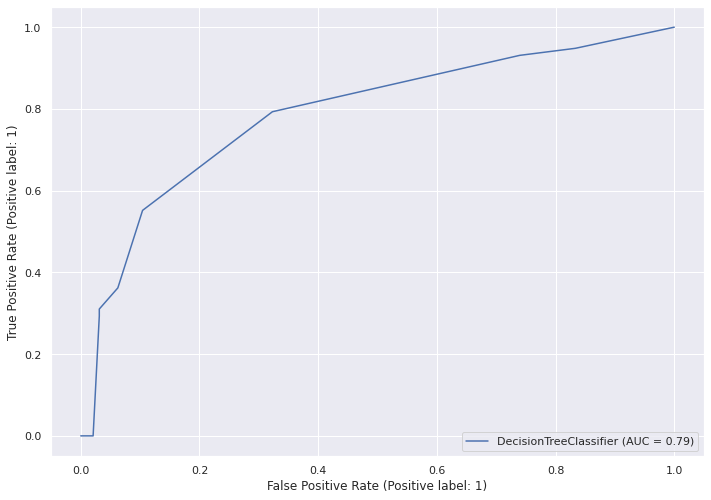

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, x_test,y_test)

The AUC score is 0.79, which is pretty well and we can conclude that the model is moderate in distinguishing the two classess.

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters_dt = [ {'criterion':['gini','entropy',"log_loss"],'splitter': ["best","random"], "max_depth": list(range(1,10)), "min_samples_split": [2]  }]
grid_search_dt = GridSearchCV(estimator = classifier,param_grid = parameters_dt,scoring = 'accuracy',cv = 10,n_jobs = -1)
grid_search_dt.fit(x_train,y_train)

dt_2 = DecisionTreeClassifier()

clf =GridSearchCV(dt_2,parameters_dt)

best_model = clf.fit(x, y)
print('Best Criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best splitter:', best_model.best_estimator_.get_params()['splitter'])
print('Optimal Depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Min Splits:', best_model.best_estimator_.get_params()['min_samples_split'])

Best Criterion: gini
Best splitter: best
Optimal Depth: 5
Min Splits: 2


Accuracy 0.7207792207792207


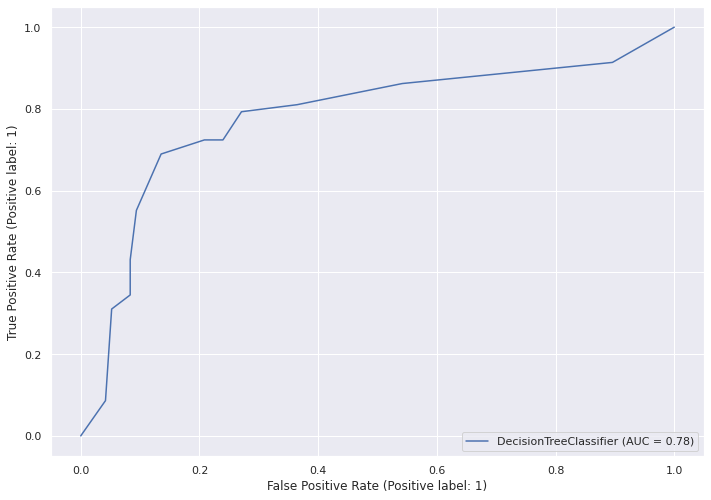

In [ ]:
classifier2 = DecisionTreeClassifier(criterion="gini", max_depth = 5, splitter ="best", min_samples_split =2)
classifier2.fit(x_train,y_train)
y_pred =classifier2.predict(x_test)
Accuracy2 = metrics.accuracy_score(y_test,y_pred)
print("Accuracy", Accuracy)
plot_roc_curve(classifier2, x_test,y_test)

The obtained accuracy after the hyper paramter tuning is the same. However, we have the AUC score has 78% which is lesser than the tree with max_depth=4

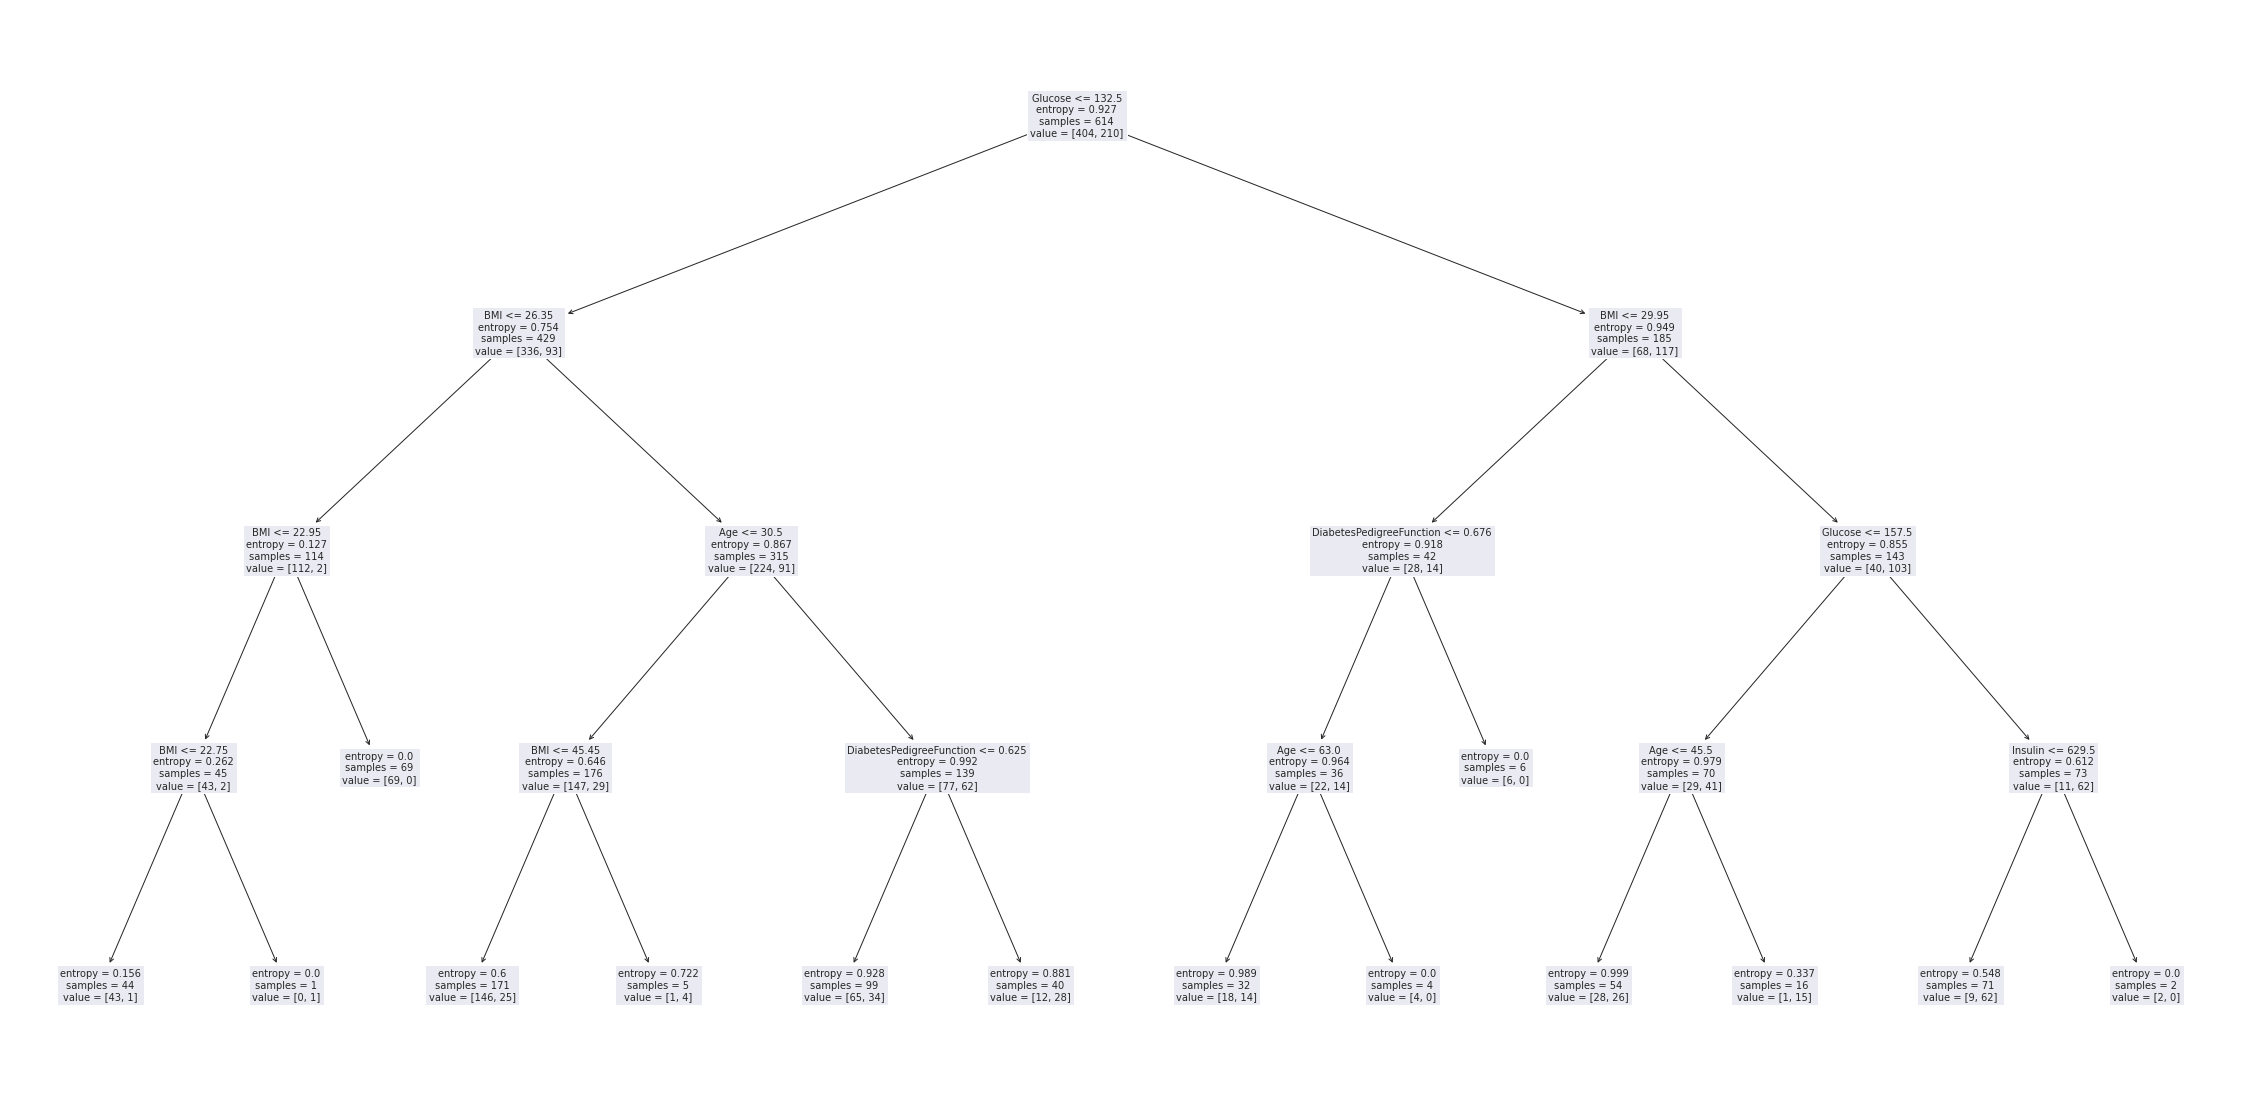

In [ ]:
plt.figure(figsize=(40,20))
tree.plot_tree(classifier, feature_names=x_train.columns)
plt.show()

## K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
k= KFold(n_splits = 10, shuffle =True)

In [ ]:
from sklearn.model_selection import cross_validate,cross_val_score
CVS = cross_val_score(classifier, x,y,scoring = "accuracy", cv = k)
CVS

array([0.79220779, 0.66233766, 0.75324675, 0.66233766, 0.71428571,
       0.7012987 , 0.76623377, 0.79220779, 0.68421053, 0.69736842])

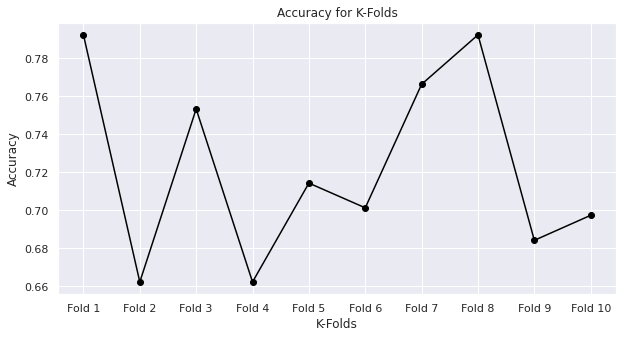

In [ ]:
y1 = ["Fold 1","Fold 2","Fold 3","Fold 4","Fold 5","Fold 6","Fold 7","Fold 8","Fold 9","Fold 10"]
plt.figure(figsize=(10,5))
plt.title("Accuracy for K-Folds")
plt.xlabel("K-Folds")
plt.ylabel("Accuracy")
plt.plot(y1, CVS, color = "black",marker = "o")
plt.show()

* We can observe from the plot that for Fold 1 and Fold 8 the accuracy is high

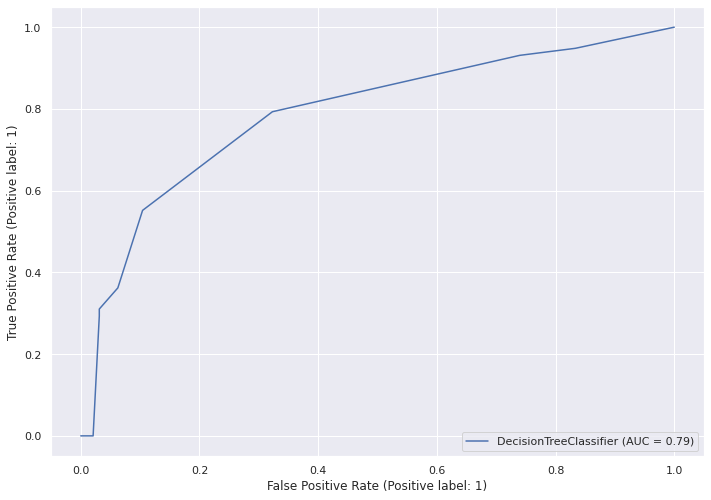

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, x_test,y_test)

As the AUC score is 0.79, we can conclude that the model is good in distinguishing the two classess. Higher the AUC, the better will be the model in predicting the clasess. There is a better chance that the classifier will  be able to distinguish between the classes